In [1]:
import re
import spacy
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#nlp = spacy.load("en_core_sci_lg")
#nlp = spacy.load("en_core_sci_sm")
#from transformers import pipeline
#from transformers import AutoTokenizer, AutoModelForMaskedLM

In [3]:
def make_bar_plot(target_col_name, figsize_=(20, 3)):
    plt.figure(figsize=figsize_)
    plt.bar(REFOLDdb_df.loc[:, target_col_name].value_counts().index, 
            REFOLDdb_df.loc[:, target_col_name].value_counts().values,
           )
    plt.xticks(rotation=-90)
    plt.title(target_col_name)
    plt.show()

In [4]:
#tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")
#model = AutoModelForMaskedLM.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")

### データのインポート

In [5]:
REFOLDdb_df = pd.read_csv("../../data/REFOLDdb/REFOLDdb_summary.csv", index_col=0)

In [6]:
REFOLDdb_df.dtypes

Protein Name                          object
Abbreviated Name                      object
SCOP Family                           object
Structure Notes                      float64
Organism                              object
UniProt Accession                     object
SCOP Unique ID                       float64
Structure Solved                     float64
Class                                 object
Molecularity                          object
Full Length                           object
Domain                                object
Chimera                               object
Variants                              object
Chain Length                           int64
Molecular Weight                     float64
Pi                                   float64
Disulphides                           object
Full Sequence                         object
Notes                                 object
Report                                object
Project Aim                           object
Fusion    

In [7]:
REFOLDdb_df.T.iloc[:, :10]

,5,7,8,9,11,12,13,14,15,16
Protein Name,Plasminogen Activator Inhibitor-1,Neuroserpin,ProCathepsin K,Extracellular Superoxide Dismutase,Growth Hormone,Alpha-1-Antitrypsin,Alpha-1-Antichymotrypsin,C1-Inhibitor,Aequorin,P53 tumor suppressor
Abbreviated Name,PAI-1,Neuroserpin,ProCathepsin K,EC-SOD,GH,A1AT,ACT,C1-Inhibitor,Aequorin,p53
SCOP Family,Serpins,Serpins,Unknown,"Cu,Zn superoxide dismutase-like",Long-Chain Cytokines,Serpins,Serpins,Serpins,Calmodulin-like,p53 DNA-binding domain-like
Structure Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organism,Human,Human,Human,Human,Human,Human,Human,Human,Aqueorea victoria,Human
UniProt Accession,P05121,Q99574,P43235,P08294,P01241,P01009,P01011,P05155,P07164,P04637
SCOP Unique ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Structure Solved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,Multi-domain proteins (alpha and beta),Multi-domain proteins (alpha and beta),Unknown,Beta,Alpha,Multi-domain proteins (alpha and beta),Multi-domain proteins (alpha and beta),Multi-domain proteins (alpha and beta),Alpha,Beta
Molecularity,Monomer,Monomer,Monomer,Tetramer,Monomer,Monomer,Monomer,Monomer,Monomer,Tetramer


In [8]:
for key, value in REFOLDdb_df.items():
    print(key, len(value.unique()))

Protein Name 735
Abbreviated Name 693
SCOP Family 249
Structure Notes 1
Organism 288
UniProt Accession 755
SCOP Unique ID 1
Structure Solved 1
Class 11
Molecularity 11
Full Length 3
Domain 149
Chimera 21
Variants 117
Chain Length 490
Molecular Weight 979
Pi 712
Disulphides 13
Full Sequence 1046
Notes 207
Report 844
Project Aim 53
Fusion 70
Protein Expression and Production 3
Expression Host 10
Expression Strain 161
Expression Temp 18
Expression Time 131
Expression Vector 457
Expression Protocol 676
Method of Induction 17
Cell Density at Induction 145
Cell Disruption Method 26
Lytic Agent 5
Pre-Refolding Purification 27
Solubility 5
Refolding Method 39
Wash Buffer 525
Solubilization Buffer 813
Refolding Buffer 907
Tag Cleaved 4
Refolding pH 61
Refolding Temperature 28
Protein Concentration 142
Refolding Time 162
Redox Agent 28
Redox Agent Concentration 254
Refolding Protocol 937
Refolding Assay 227
Refolding Chaperones 15
Refolding Additives 57
Additives Concentration 113
Refolding Yiel

In [9]:
REFOLDdb_df.columns

Index(['Protein Name', 'Abbreviated Name', 'SCOP Family', 'Structure Notes',
       'Organism', 'UniProt Accession', 'SCOP Unique ID', 'Structure Solved',
       'Class', 'Molecularity', 'Full Length', 'Domain', 'Chimera', 'Variants',
       'Chain Length', 'Molecular Weight', 'Pi', 'Disulphides',
       'Full Sequence', 'Notes', 'Report', 'Project Aim', 'Fusion',
       'Protein Expression and Production', 'Expression Host',
       'Expression Strain', 'Expression Temp', 'Expression Time',
       'Expression Vector', 'Expression Protocol', 'Method of Induction',
       'Cell Density at Induction', 'Cell Disruption Method', 'Lytic Agent',
       'Pre-Refolding Purification', 'Solubility', 'Refolding Method',
       'Wash Buffer', 'Solubilization Buffer', 'Refolding Buffer',
       'Tag Cleaved', 'Refolding pH', 'Refolding Temperature',
       'Protein Concentration', 'Refolding Time', 'Redox Agent',
       'Redox Agent Concentration', 'Refolding Protocol', 'Refolding Assay',
       'Re

In [10]:
REFOLDdb_index_category_dict = {"Protein": ['Protein Name', 'Abbreviated Name', 'SCOP Family', 'Structure Notes', 'Organism', 'UniProt Accession', 'SCOP Unique ID', 'Structure Solved','Class', 'Molecularity'],
                                "Construct": ['Full Length', 'Domain', 'Chimera', 'Variants', 'Chain Length', 'Molecular Weight', 'Pi', 'Disulphides', 'Full Sequence', 'Notes'],
                               "Expression": ['Report', 'Project Aim', 'Fusion','Protein Expression and Production', 'Expression Host','Expression Strain', 'Expression Temp', 'Expression Time','Expression Vector', 'Expression Protocol', 'Method of Induction','Cell Density at Induction', 'Cell Disruption Method', 'Lytic Agent','Pre-Refolding Purification', 'Solubility'],
                               "Refolding":['Refolding Method', 'Wash Buffer', 'Solubilization Buffer', 'Refolding Buffer', 'Tag Cleaved', 'Refolding pH', 'Refolding Temperature', 'Protein Concentration', 'Refolding Time', 'Redox Agent', 'Redox Agent Concentration', 'Refolding Protocol', 'Refolding Assay', 'Refolding Chaperones', 'Refolding Additives', 'Additives Concentration', 'Refolding Yield', 'Purity']}


# protein

In [11]:
REFOLDdb_df.loc[:, REFOLDdb_index_category_dict["Protein"]]

,Protein Name,Abbreviated Name,SCOP Family,Structure Notes,Organism,UniProt Accession,SCOP Unique ID,Structure Solved,Class,Molecularity
5,Plasminogen Activator Inhibitor-1,PAI-1,Serpins,NaN,Human,P05121,NaN,NaN,Multi-domain proteins (alpha and beta),Monomer
7,Neuroserpin,Neuroserpin,Serpins,NaN,Human,Q99574,NaN,NaN,Multi-domain proteins (alpha and beta),Monomer
8,ProCathepsin K,ProCathepsin K,Unknown,NaN,Human,P43235,NaN,NaN,Unknown,Monomer
9,Extracellular Superoxide Dismutase,EC-SOD,"Cu,Zn superoxide dismutase-like",NaN,Human,P08294,NaN,NaN,Beta,Tetramer
11,Growth Hormone,GH,Long-Chain Cytokines,NaN,Human,P01241,NaN,NaN,Alpha,Monomer
...,...,...,...,...,...,...,...,...,...,...
1352,Carbonic anhydrase bovine erythrocytes,CA-BE,Unknown,NaN,bovine erythrocytes,NaN,NaN,NaN,Unknown,Unknown
1353,Lysozyme,Lysozyme,C-type Lysozyme,NaN,Chicken Egg White,NaN,NaN,NaN,Alpha+Beta,Unknown
1355,Trypsin inhibitor,TI,Unknown,NaN,Escherichia coli,NaN,NaN,NaN,Unknown,Monomer
1356,Arginine Deiminase,AD,Unknown,NaN,listeria monocytogenes,Q8YAS0,NaN,NaN,Unknown,Unknown


In [12]:
REFOLDdb_df.loc[:, "Structure Notes"].value_counts()

Series([], Name: Structure Notes, dtype: int64)

In [13]:
REFOLDdb_df.loc[:, "Structure Solved"].value_counts()

Series([], Name: Structure Solved, dtype: int64)

# construct
- 数値っぽいもの
    - Chain Length
    - Molecular Weight

In [14]:
REFOLDdb_df.loc[:, REFOLDdb_index_category_dict["Construct"]]

,Full Length,Domain,Chimera,Variants,Chain Length,Molecular Weight,Pi,Disulphides,Full Sequence,Notes
5,y,NaN,NaN,NaN,418,47186.9,6.67844,0,\n \t\tMRGSHHHHHHGMASMTGGQQMGRD...,NaN
7,y,NaN,NaN,NaN,394,44941.1,5.24343,0,\n \t\tMRGSHHHHHH ADLS VNMYNRLR...,NaN
8,y,NaN,NaN,NaN,324,36565.3,8.72453,3,\n \t\tMRGSHHHHHH LYPEE ILDTHWE...,NaN
9,y,NaN,NaN,NaN,243,26457.3,6.75481,1,\n \t\tMGSSHHHHHHSSGLVPRGSHM WT...,NaN
11,y,NaN,NaN,NaN,191,22129.0,5.26800,2,\n \t\tFPTI PLSRLFDNAM LRAHRLHQ...,a range of solubilization buffers tested.
...,...,...,...,...,...,...,...,...,...,...
1352,y,NaN,NaN,NaN,260,29113.8,6.40522,Unknown,\n \t\tMSHHWGYGKH NGPEHWHKDF PI...,NaN
1353,y,NaN,NaN,NaN,129,14313.1,9.32374,Unknown,\n \t\tKVFGRCELAAAMKRHGLDNYRGYS...,The Schiff reagents from Boston Protein Soluti...
1355,n,163,NaN,NaN,3,204.2,5.24001,0,\n \t\tS V\r\n\n\t\t\t,NaN
1356,y,NaN,NaN,NaN,411,47114.9,5.11579,Unknown,\n \t\tMKMEQALNITSEIGKLQTVLVKRP...,NaN


# Expression

- 数値っぽいもの
    - "Expression Temp": ok
    - "Expression Time": Expression Time min, Expression Time maxに分解
    - "Cell Density at Induction": 直す必要なし？
    

In [15]:
REFOLDdb_df.loc[:, REFOLDdb_index_category_dict["Expression"]]

,Report,Project Aim,Fusion,Protein Expression and Production,Expression Host,Expression Strain,Expression Temp,Expression Time,Expression Vector,Expression Protocol,Method of Induction,Cell Density at Induction,Cell Disruption Method,Lytic Agent,Pre-Refolding Purification,Solubility
5,"Hak-Joo Lee, Hana Im\n\t\t\t\t\t(2003)\n\t\t\t...",Undefined,N-terminal hexahistidine tag,Protein recombinantly expressed as and refolde...,Escherichia coli,BL21,37.0,3h,pRSET B,\r\nCells were grown at 37degC in 1 L M9ZB med...,Not Stated,OD 600 =\n\t\t\t\t\t0.6,Sonication,None,None,partial
7,"Belorgey D, Crowther DC, Mahadeva R, Lomas DA....",Functional Studies,N-terminal hexahistidine tag,Protein recombinantly expressed as and refolde...,Escherichia coli,SG13009 (pREP4),30.0,3h,pQE31,\r\nCells were grown in 2 liters of 2TY at 37d...,IPTG,OD 600 =\n\t\t\t\t\t0.8-1.0,Sonication,None,None,soluble
8,"Hwang HS, Chung HS.\n\t\t\t\t\t(2002)\n\t\t\t\...",Functional Studies,N-terminal hexahistidine tag,Protein recombinantly expressed as and refolde...,Escherichia coli,JM109,37.0,4h,pQE-30,The E. coli strain JM109 was transformed with ...,IPTG,OD =\n\t\t\t\t\t,Sonication,None,Metal affinity chromatography,soluble
9,"He HJ, Yuan QS, Yang GZ, Wu XF.\n\t\t\t\t\t(20...",Undefined,N-terminal hexahistidine tag,Protein recombinantly expressed as and refolde...,Escherichia coli,BL21,32.0,3-5h,pET28a,An overnight culture of cells was diluted 1:10...,IPTG,OD 600 =\n\t\t\t\t\t0.5,Sonication,Lysozyme,Metal affinity chromatography,partial
11,"Patra AK, Mukhopadhyay R, Mukhija R, Krishnan ...",Undefined,None,Protein recombinantly expressed as and refolde...,Escherichia coli,M15,37.0,4h,pQE-60,"For large-scale production of r-hGH, recombina...",IPTG,OD 600 =\n\t\t\t\t\t40,Sonication/French Press,None,None,not stated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Unpublished\n\t\t\t\t\t(0)\n\t\t\t\t\tJ Virol ...,Folding,None,Protein expressed and purified in native confo...,NaN,NaN,0.0,0,NaN,NaN,Not Stated,OD =\n\t\t\t\t\t,None,None,None,NaN
1353,Unpublished\n\t\t\t\t\t(0)\n\t\t\t\t\tJ Virol ...,Folding,None,Protein expressed and purified in native confo...,NaN,NaN,0.0,0,NaN,NaN,Not Stated,OD =\n\t\t\t\t\t,None,None,None,NaN
1355,Unpublished\n\t\t\t\t\t(0)\n\t\t\t\t\tJ Virol ...,Structure-Function,None,Protein expressed and purified in native confo...,NaN,NaN,0.0,0,NaN,NaN,Not Stated,OD =\n\t\t\t\t\t,None,None,DEAE-Sepharose Fast Flow column,NaN
1356,Unpublished\n\t\t\t\t\t(0)\n\t\t\t\t\tJ Virol ...,Analysis,C-terminal hexahis + pro seq,Protein recombinantly expressed as and refolde...,E.coli,rosetta,37.0,3h,pet30a,E. coli £¨rosetta)cells harboring pET30a-arcA ...,IPTG,OD 0.6 =\n\t\t\t\t\t530,Sonication,Chemicals,Affinity chromotography,insoluble


## "Expression Temp"

In [16]:
REFOLDdb_df.loc[:, "Expression Temp"]

5       37.0
7       30.0
8       37.0
9       32.0
11      37.0
        ... 
1352     0.0
1353     0.0
1355     0.0
1356    37.0
1357    37.0
Name: Expression Temp, Length: 1165, dtype: float64

In [17]:
REFOLDdb_df.loc[:, "Expression Temp"].describe()

count    1165.000000
mean       32.011159
std        11.983123
min         0.000000
25%        37.000000
50%        37.000000
75%        37.000000
max        42.000000
Name: Expression Temp, dtype: float64

## "Expression Time"
5-6daysが気になる

In [18]:
REFOLDdb_df.loc[:, "Expression Time"].describe()

count     1145
unique     130
top         4h
freq       139
Name: Expression Time, dtype: object

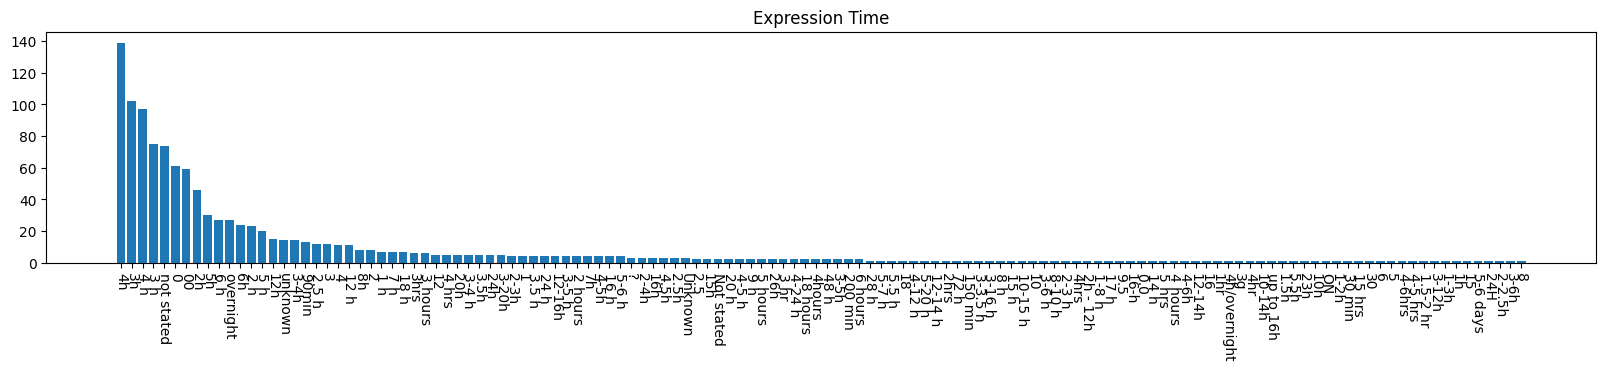

In [19]:
make_bar_plot("Expression Time")

In [20]:
def fix_expression_time(target_value):
    flag_bar = False
    flag_min = False
    
    if type(target_value)==str:
        #特殊系
        if "16-h" == target_value:
            return 16, 16
        if "not stated" == target_value or "unknown" == target_value or "Unknown" == target_value or "Not stated" == target_value or "?" == target_value or "ON" == target_value:
            return False, False
        if "overnight" == target_value or "4h/overnight" == target_value:
            return 12, 12
        if "3g" == target_value:
            return 3, 3
        if "up to 16h" == target_value:
            return 16, 16
        if "5-6 days" == target_value:
            return 24 * 5, 24 * 6
        
        # 空白の削除
        target_value = target_value.replace(" ", "")
        # hoursの削除
        target_value = target_value.replace("hours", "")
        # hrsの削除
        target_value = target_value.replace("hrs", "")
        # hrの削除
        target_value = target_value.replace("hr", "")
        # hの削除
        target_value = target_value.replace("h", "")
        # H
        target_value = target_value.replace("H", "")
        
        #削除
        if "-" in target_value:
            flag_bar = True
        if "min" in target_value:
            flag_min = True
        
        if flag_bar == 1 and flag_min == 0:
        # -への対応
            target_value_min, target_value_max = target_value.split("-")
            
        # minへの対応
        if flag_bar == 0 and flag_min == 1:
            target_value = target_value.replace("min", "")
            try:
                target_value = float(target_value) / 60
                target_value_min, target_value_max = target_value, target_value
            except:
                raise ValueError("minが入っている文字列に数値以外の文字列も入っています。")
                
        if flag_bar == 0 and flag_min == 0:
            target_value_min, target_value_max = target_value, target_value
                
    else:
        target_value_min, target_value_max = target_value, target_value
    
    return target_value_min, target_value_max

In [21]:
# expression timeのテスト
test_expression_time_list = REFOLDdb_df["Expression Time"].value_counts().keys()
print('{0:18} | {1:18} | {2:18}'.format("original", "target_value_min", "target_value_max"))
for _, target_value in enumerate(test_expression_time_list):
    target_value_min, target_value_max = fix_expression_time(target_value)
    try:
        float(target_value_min), float(target_value_max)
    except:
        print('{0:18} | {1:18} | {2:18}'.format(target_value, target_value_min, target_value_max), _)

original           | target_value_min   | target_value_max  


In [22]:
# 記録
expression_time_min_list = []
expression_time_max_list = []
for key, value in REFOLDdb_df.loc[:, "Expression Time"].items():
    target_value_min, target_value_max = fix_expression_time(value)
    if target_value_min and target_value_max:
        expression_time_min_list.append(float(target_value_min))
        expression_time_max_list.append(float(target_value_max))
    else:
        expression_time_min_list.append(target_value_min)
        expression_time_max_list.append(target_value_max)

In [23]:
expression_time_min = "Expression Time min"
expression_time_max = "Expression Time max"
REFOLDdb_df[expression_time_min] = expression_time_min_list
REFOLDdb_df[expression_time_max] = expression_time_max_list

### expression time min

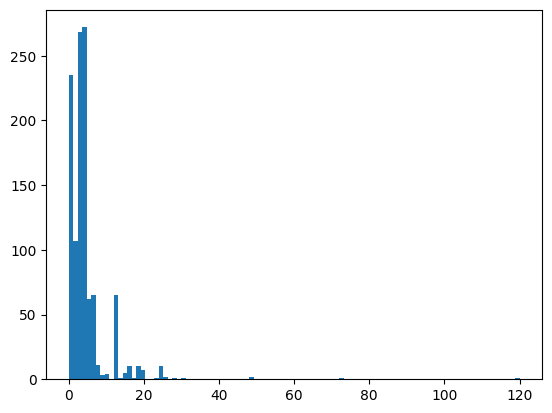

In [24]:
plt.hist(REFOLDdb_df.loc[:, expression_time_min], bins=100);

In [25]:
REFOLDdb_df.loc[:, expression_time_max].describe()

count     1145.0
unique      34.0
top          4.0
freq       279.0
Name: Expression Time max, dtype: float64

### expression time max

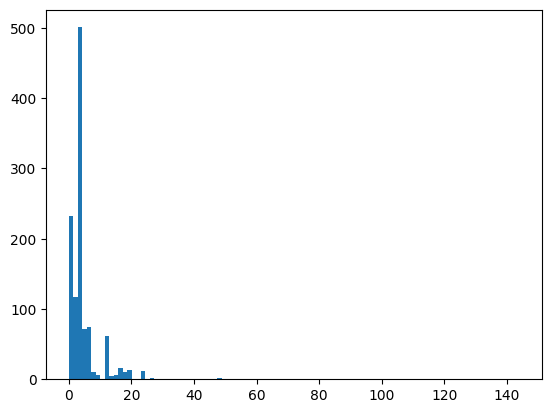

In [26]:
plt.hist(REFOLDdb_df.loc[:, expression_time_max], bins=100);

### Cell Density at Induction

/Users/nmiuchi/programming/a_repo/pmc_env/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


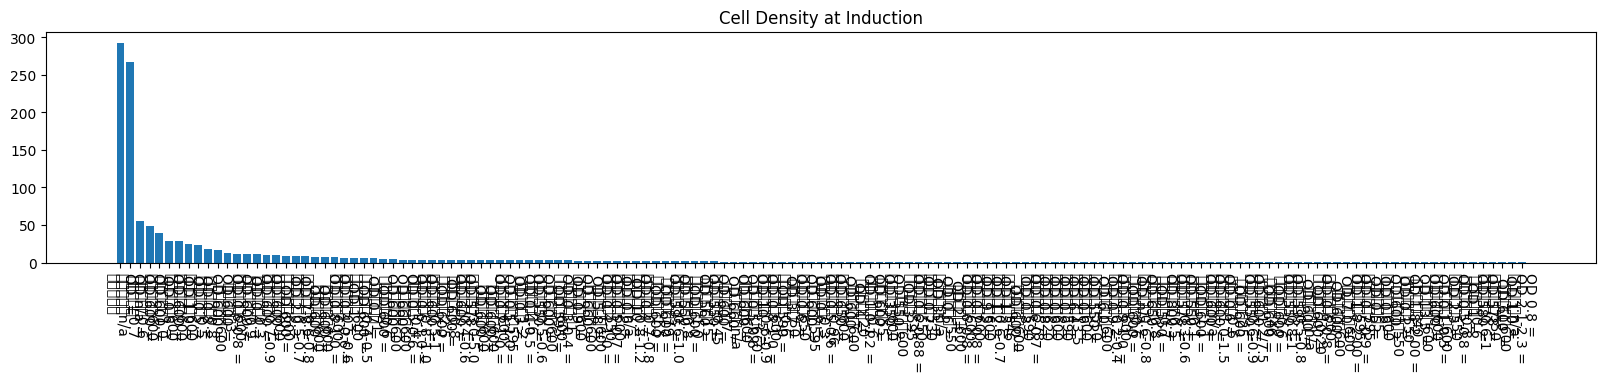

In [27]:
make_bar_plot("Cell Density at Induction")

In [28]:
def fix_cell_density_at_induction(target_value):
    if type(target_value)==str and len(target_value.split("=")) == 2:
        target_value = target_value.replace("\n", "").replace("\t", "")
        OD_set, OD_value = target_value.split("=")
        
    else:
        pass
    
    return OD_set, OD_value

In [29]:
## Cell Density at Inductionのテスト
#test_cell_density_at_induction_list = REFOLDdb_df["Cell Density at Induction"].value_counts().keys()
#print('{0:18} | {1:18} | {2:18}'.format("original", "target_value_min", "target_value_max"))
#for _, target_value in enumerate(test_cell_density_at_induction_list):
#    OD_set, OD_value = fix_cell_density_at_induction(target_value)
#    print('{0:18} | {1:18}'.format(OD_set, OD_value), _)
#    #print(fixed_target_value)

# Refolding
- 数値っぽいもの
    - Refolding Temperature
    - Protein Concentration
    - Refolding Time
    - Refolding Yield
    - Purity

In [30]:
REFOLDdb_df.loc[:, REFOLDdb_index_category_dict["Refolding"]]

,Refolding Method,Wash Buffer,Solubilization Buffer,Refolding Buffer,Tag Cleaved,Refolding pH,Refolding Temperature,Protein Concentration,Refolding Time,Redox Agent,Redox Agent Concentration,Refolding Protocol,Refolding Assay,Refolding Chaperones,Refolding Additives,Additives Concentration,Refolding Yield,Purity
5,Dilution,NaN,"4M guanidinium chloride, 20 mM sodium acetate,...","20mM sodium acetate, 1M NaCl, 0.01% Tween 80, ...",yes,5.6,25.0,NaN,1h,None,NaN,"\r\nCells were disrupted using the sonicator, ...",Enzyme activity,None,None,NaN,NaN,NaN
7,Dilution,"50mM Tris-HCl, 100mM NaCl, 10mM EDTA, 0.05% v/...","10mM Tris-HCl, 100mM NaH2PO4, 6M guanidium chl...","20 mM NaH2PO4, 100mM NaCl, pH 7.8",no,7.8,4.0,NaN,12h,None,NaN,"The cells were harvested by centrifugation, re...",Enzyme activity,None,None,NaN,NaN,NaN
8,Dilution/Dialysis combination,"50mM Tris-HCl, 500mM NaCl, 2M urea pH 8.0","50mM Tris-HCl, 500mM NaCl, 6M urea, 5mM imidaz...","50mM Tris-HCl, 500mM NaCl, 5mM EDTA, 10mM GSH,...",yes,8.0,4.0,60 micrograms/ml,12h,GSH/GSSG,10mM/1mM,Inclusion bodies were stirred in solubilizatio...,Enzyme activity,None,"None,L-Arginine",0.7M,3.5mg from 100ml culture,see gel attached
9,Dilution/Dialysis combination,NaN,"20mM Tris-HCl, 1mM PMSF, 0.5M NaCl, 5mM imidaz...","PBS, 150mM NaCl, 0.6M urea, 2mM GSH, 0.2mM GSS...",no,7.4,4.0,NaN,48,GSH/GSSG,2mM/0.2mM,Refolding was initiated by 10-fold dilution in...,Enzyme activity,None,"None,L-Arginine",0.5M,NaN,NaN
11,Dilution,"50 mM Tris-HCl pH 8.0, 5 mM EDTA , 2% deoxycho...","100mM Tris-HCl, 2M urea, pH12.5","20mM Tris-HCl, 0.4M urea",no,8.5,25.0,NaN,NaN,None,NaN,Pure inclusion bodies were isolated (104 mg pr...,Bioactivity,None,None,NaN,50%,>90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Dialysis,None,"8 M urea in 50 mM phosphate, pH 8, Schiff reag...","Tris, 50 mM, pH 8",no tag,8.0,4.0,1.0 mg/ml,20 hours,None,NaN,None,Activity assay,none,Schiff base reagents from Boston Protein Solut...,20 mM,81%,NaN
1353,Dilution,None,"8 M urea in 50 mM phosphate, pH 8, 10 mM DTT","Tris 50 mM, pH 8 with Schiff base reagents fro...",no tag,8.0,25.0,0.91 mg/ml,20 hours,GSH/GSSG,1 mM/2mM,None. The Schiff reagents from Boston Protein...,Activity assay,None,Schiff base reagents from Boston Protein Solut...,0.2%-2%,87%,>90%
1355,Dialysis,Tris-HCl 50mM pH 8.0,Tris-HCl 50mM pH 8.0,"(Guanidine hidrochloride 8-2M); (Ureia 2M, L-A...",no,8.5,25.0,140 mM,24 h,None,NaN,NaN,enzyme activity,None,None,NaN,10,NaN
1356,Dilution,10mM potassium phosphate buffer(pH7.0) contain...,6M Gdn-HCl,10mM potassium phosphate buffer(pH7.0),no,7.0,25.0,NaN,45h,DTT,NaN,"1¡¢ Add the solubilized, unfolded protein (in ...",Activity assay,None,None,DTT,no activity,NaN


### "Refolding Temperature"

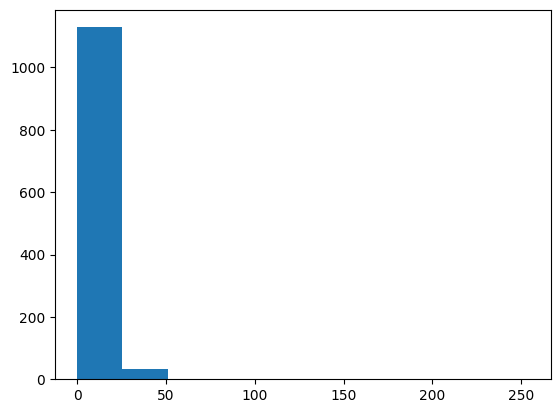

In [31]:
plt.hist(REFOLDdb_df.loc[:, "Refolding Temperature"], bins=10);

In [32]:
REFOLDdb_df.loc[:, "Refolding Temperature"].describe()

count    1165.000000
mean       12.991416
std        13.155099
min         0.000000
25%         4.000000
50%         4.000000
75%        25.000000
max       254.000000
Name: Refolding Temperature, dtype: float64

In [33]:
REFOLDdb_df[REFOLDdb_df.loc[:, "Refolding Temperature"] > 50].loc[:, "Refolding Temperature"]

100    254.0
227     65.0
851    100.0
Name: Refolding Temperature, dtype: float64

In [34]:
REFOLDdb_df[REFOLDdb_df.loc[:, "Refolding Temperature"] > 50].loc[:, "Refolding Temperature"]

100    254.0
227     65.0
851    100.0
Name: Refolding Temperature, dtype: float64

## 外れ値の確認

In [35]:
#正しかった
REFOLDdb_df[REFOLDdb_df.loc[:, "Refolding Temperature"] > 50].loc[227, "Refolding Protocol"]

'Agitation induced aggregates of human growth hormone (Genenech) were diluted in refolding buffer and placed in a heat sealed plastic syringe.  The samples were placed under pressure at 2000 bar then heated to 65 deg C and held for 24 hours, cooled then depressurized slowly.  '

## 正しい値に変更 

In [36]:
REFOLDdb_df[REFOLDdb_df.loc[:, "Refolding Temperature"] > 50].loc[100, "Refolding Protocol"]

'The solubilised protein was diluted 100-fold in 50mM Tris-HCl, 20% glycerol pH 7.2.  The solution was then dialysed continually in an artificial kidney in a cold room against 6L of the same buffer.  The protein solution was stored at 4 degrees C for 24h prior to purification with anion exchange chromatography.'

In [37]:
REFOLDdb_df.loc[100, "Refolding Temperature"] = 4

### 削除

In [38]:
REFOLDdb_df[REFOLDdb_df.loc[:, "Refolding Temperature"] > 50].loc[851, "Refolding Protocol"]

'For Deaggregation, amyloid Sup35NM was boiled at 100 degrees for 10 minutes. '

In [39]:
REFOLDdb_df[REFOLDdb_df["Protein Name"] == "prion-like yeast protein"]

,Protein Name,Abbreviated Name,SCOP Family,Structure Notes,Organism,UniProt Accession,SCOP Unique ID,Structure Solved,Class,Molecularity,...,Refolding Protocol,Refolding Assay,Refolding Chaperones,Refolding Additives,Additives Concentration,Refolding Yield,Purity,URL,Expression Time min,Expression Time max
851,prion-like yeast protein,Sup35NM,Unknown,NaN,Saccharomyces cerevisiae,NaN,NaN,NaN,Unknown,Unknown,...,"For Deaggregation, amyloid Sup35NM was boiled ...",SDS-PAGE,None,None,NaN,NaN,NaN,https://pford.info/refolddatabase/refoldingrec...,3.0,3.0


In [40]:
REFOLDdb_df = REFOLDdb_df[REFOLDdb_df["Protein Name"] != "prion-like yeast protein"]

## 確認

In [41]:
REFOLDdb_df.loc[:, "Refolding Temperature"].describe()

count    1164.000000
mean       12.701890
std        10.804507
min         0.000000
25%         4.000000
50%         4.000000
75%        25.000000
max        65.000000
Name: Refolding Temperature, dtype: float64

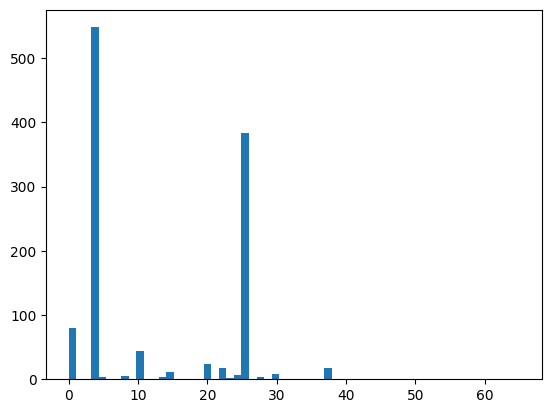

In [42]:
plt.hist(REFOLDdb_df.loc[:, "Refolding Temperature"], bins=60);

# Protein Concentration

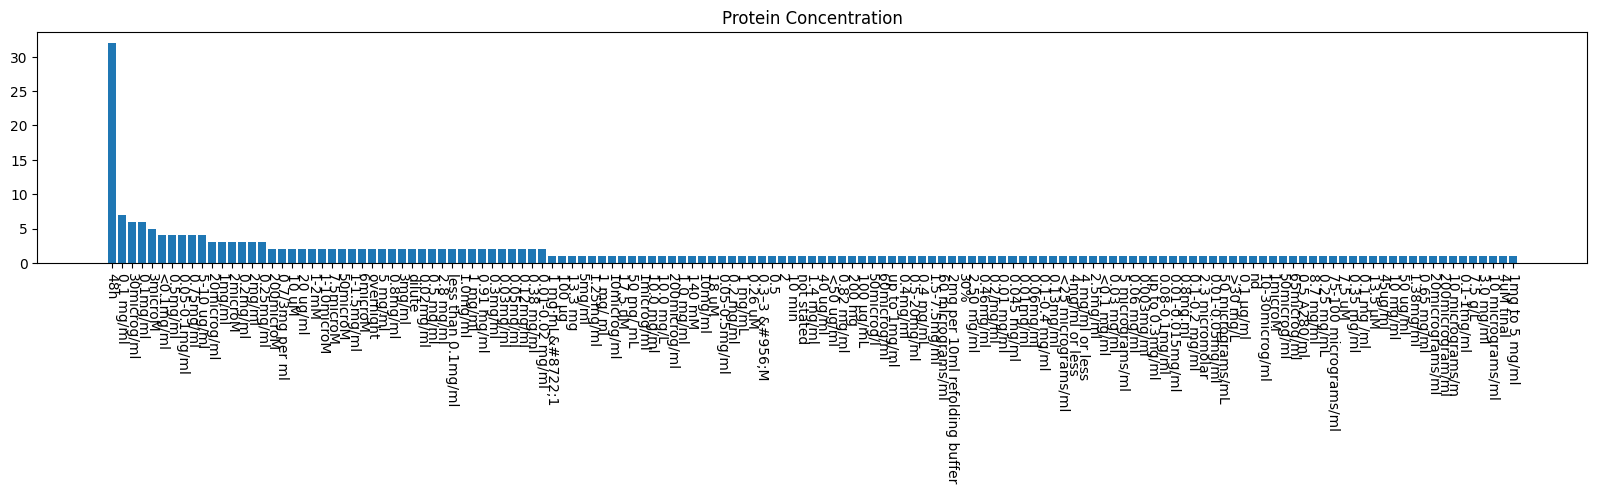

In [43]:
make_bar_plot("Protein Concentration")

In [44]:
def fix_protein_concentration(target_value):
    ...

In [45]:
def extract_value(target_value):
    target_value = target_value.replace("&#8722;", "")
    target_value = target_value.replace("&#956;", "")
    extracted_value_list = re.findall("\d+(?:\.\d+)?", target_value)
    if type(extracted_value_list) == list and len(extracted_value_list) == 2:
        max_protein_concentration_value , min_protein_concentration_value = extracted_value_list[1], extracted_value_list[0]
    elif len(extracted_value_list) == 1:
        max_protein_concentration_value , min_protein_concentration_value = extracted_value_list[0], extracted_value_list[0]
    else:
        max_protein_concentration_value , min_protein_concentration_value = np.nan, np.nan
        
    return max_protein_concentration_value , min_protein_concentration_value

In [46]:
REFOLDdb_df.loc[:, "Protein Concentration"].value_counts()

48h                 32
0.1 mg/ml            7
30microg/ml          6
0.1mg/ml             6
3microM              5
                    ..
7.5 g/L              1
3.0 mg/ml            1
10 micrograms/ml     1
4uM final            1
1mg to 5 mg/ml       1
Name: Protein Concentration, Length: 141, dtype: int64

In [47]:
max_protein_concentration_value_list = []
min_protein_concentration_value_list = []
for _ in REFOLDdb_df.loc[:, "Protein Concentration"].values:
    if type(_) == str:
        max_protein_concentration_value , min_protein_concentration_value = extract_value(_)
        max_protein_concentration_value_list.append(float(max_protein_concentration_value))
        min_protein_concentration_value_list.append(float(min_protein_concentration_value))
    else:
        max_protein_concentration_value_list.append(_)
        min_protein_concentration_value_list.append(_)

In [48]:
REFOLDdb_df.loc[:, "Protein_Concentration_max"] = max_protein_concentration_value_list
REFOLDdb_df.loc[:, "Protein_Concentration_min"] = min_protein_concentration_value_list

In [49]:
def extract_unit(target_value):
    target_value = target_value.replace("&#", "")
    target_value = target_value.replace(";", "")
    target_value = target_value.replace(" ", "")
    target_value = target_value.replace(".", "")
    target_value = target_value.replace("-", "")
    unit_list = re.findall("\D+", target_value)
    target_unit = "_".join(unit_list)
    
    unit_convert_dict = {"mg/ml": "mg/ml",
                         "microM": "mM",
                         "microg/ml":"mg/ml",
                         "micrograms/ml": "mg/ml",
                         "micromolar": "mM",
                         "mgml": "mg/ml",
                         "upto_mg/ml": "mg/ml",
                         "lessthan_mg/ml": "mg/ml",
                         "<_mg/ml": "mg/ml",
                         "mg/mlorless": "mg/ml",
                         "<_micrograms/ml": "mg/ml",
                         "/mg/ml": "mg/ml",
                         'micrograms/mL': "mg/ml",
                         'nd': np.nan,
                         "h": np.nan,
                         "uMfinal": "uM",
                         '>_mg/L': "ug/ml",
                         'g/L': "mg/ml",
                         "micrograms/m": "mg/ml",
                         "microgram/ml": "mg/ml",
                         "dilute": np.nan,
                         'mg/mL': "mg/ml",
                         '/_mgperml': "mg/ml",
                         ',_µg/ml': "mg/ml",
                         "mgper_mlrefoldingbuffer": "mg/ml",
                         "overnight": np.nan,
                         'microg/l': "mg/ml",
                         'µg/mL': "ug/ml",
                         "<_ug/ml": "ug/ml",
                         'mg·mL': "mg/ml",
                         'mg/L': "ug/ml",
                         'min': np.nan,
                         '–_M': "M",
                         'mgto_mg/ml': "mg/ml",
                         "": np.nan,
                         "µM": "uM",
                         "notstated": np.nan,
                         'mg': "mg",
                         'µg': "ug",
                         'A_/ml': np.nan,
                         '%': '%',
                         "ug/ml": "ug/ml",
                         "uM": "uM",
                         "mM": "mM"
                        }
    
    if target_unit in unit_convert_dict.keys():
        target_unit = unit_convert_dict[target_unit]
    else:
        raise ValueError()
        
    return target_unit

In [50]:
protein_concentration_unit_list = []
for _ in REFOLDdb_df.loc[:, "Protein Concentration"].values:
    if type(_) == str:
        protein_concentration_unit = extract_unit(_)
        protein_concentration_unit_list.append(protein_concentration_unit)
    else:
        protein_concentration_unit_list.append(_)

collections.Counter(protein_concentration_unit_list)

Counter({nan: 959,
         'mg/ml': 156,
         'mM': 23,
         '%': 1,
         'ug/ml': 13,
         'uM': 8,
         'M': 1,
         'mg': 2,
         'ug': 1})

In [51]:
REFOLDdb_df.loc[:, "Protein_Concentration_unit"] = protein_concentration_unit_list

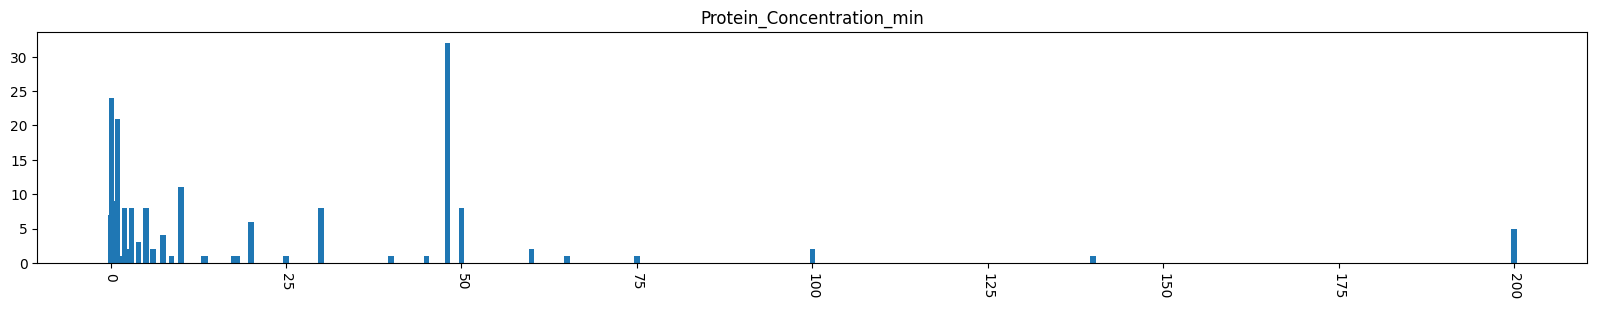

In [52]:
make_bar_plot("Protein_Concentration_min")

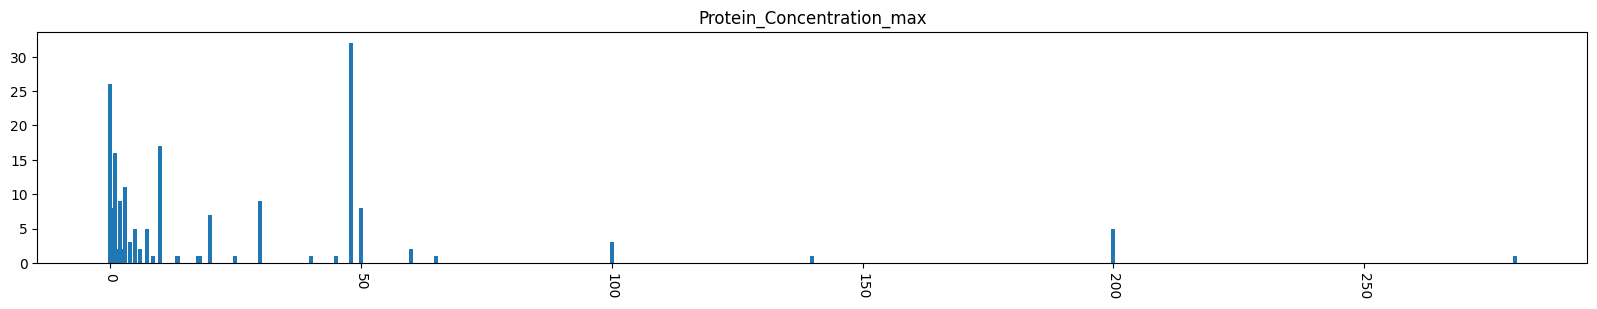

In [53]:
make_bar_plot("Protein_Concentration_max")

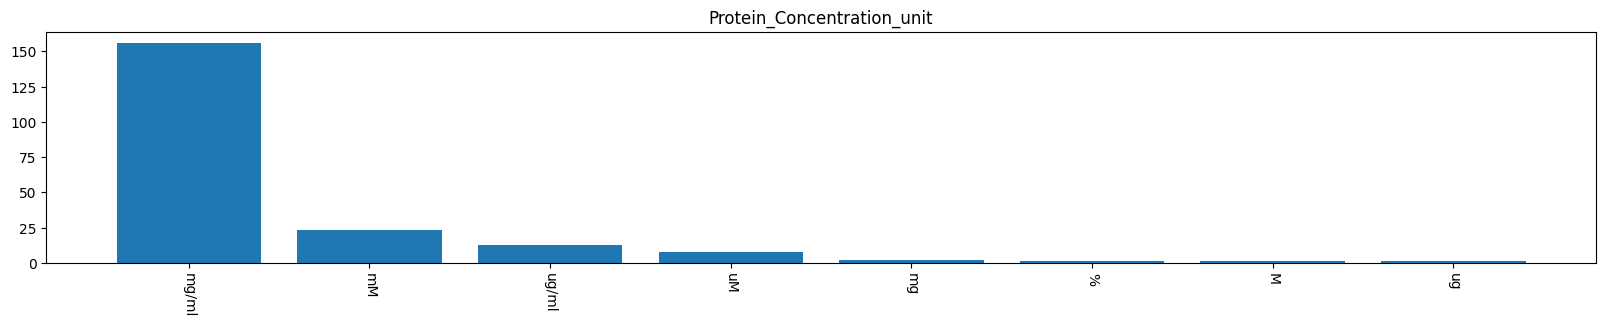

In [54]:
make_bar_plot("Protein_Concentration_unit")

In [55]:
REFOLDdb_df["Protein_Concentration_unit"].value_counts()

mg/ml    156
mM        23
ug/ml     13
uM         8
mg         2
%          1
M          1
ug         1
Name: Protein_Concentration_unit, dtype: int64

In [56]:
#protein_concentration_M_max_list = []
#protein_concentration_M_min_list = []
#protein_concentration_mgml_max_list = []
#protein_concentration_mgml_min_list = []
#for key, value in REFOLDdb_df.loc[: ,["Protein_Concentration_max", "Protein_Concentration_min", "Protein_Concentration_unit"]].iterrows():
#    if value["Protein_Concentration_unit"] == "mg/ml":
#        protein_concentration_mgml_max_list.append()
#    elif value["Protein_Concentration_unit"] == "mM":
#        ...
#    elif value["Protein_Concentration_unit"] == "mM":
#        ...
#    elif value["Protein_Concentration_unit"] == "ug/ml":
#        ...
#    elif value["Protein_Concentration_unit"] == "uM":
#        ...
#    elif value["Protein_Concentration_unit"] == "M":
#        ...
#    elif value["Protein_Concentration_unit"] == :
#        ...

# Refolding Time

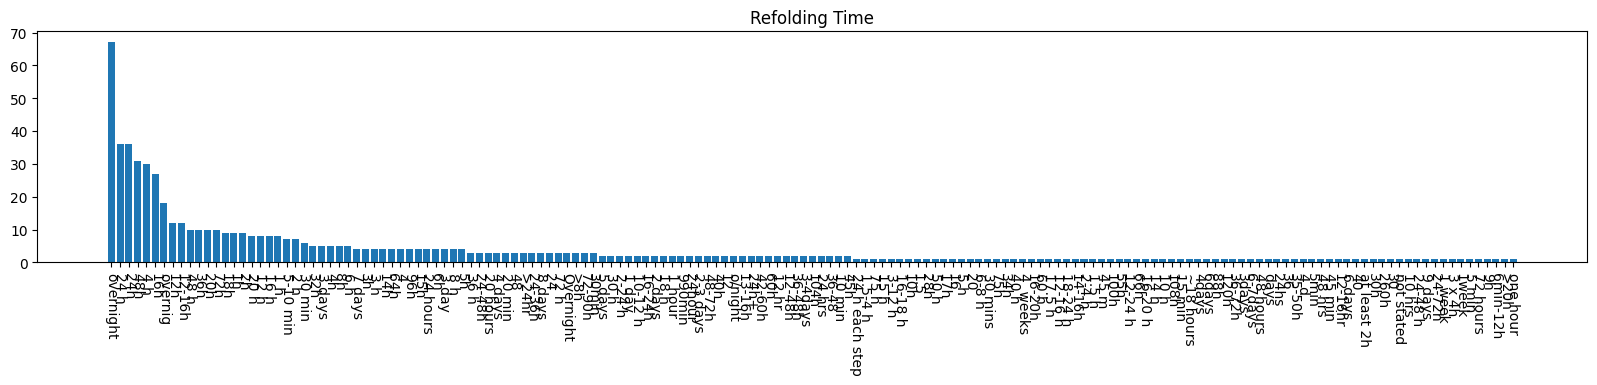

In [57]:
make_bar_plot("Refolding Time")

In [58]:
def extract_refolding_time(target_value):
    #target_value = target_value.replace("&#8722;", "")
    #target_value = target_value.replace("&#956;", "")
    extracted_value_list = re.findall("\d+(?:\.\d+)?", target_value)
    if type(extracted_value_list) == list and len(extracted_value_list) == 2:
        max_refolding_time_value , min_refolding_time_value = extracted_value_list[1], extracted_value_list[0]
    elif len(extracted_value_list) == 1:
        max_refolding_time_value , min_refolding_time_value = extracted_value_list[0], extracted_value_list[0]
    else:
        max_refolding_time_value , min_refolding_time_value = np.nan, np.nan
        
    return max_refolding_time_value, min_refolding_time_value

In [59]:
max_refolding_time_value_list = []
min_refolding_time_value_list = []
for _ in REFOLDdb_df.loc[:, "Refolding Time"].values:
    if type(_) == str:
        max_refolding_time_value , min_refolding_time_value = extract_value(_)
        max_refolding_time_value_list.append(float(max_refolding_time_value))
        min_refolding_time_value_list.append(float(min_refolding_time_value))
        #print(max_refolding_time_value, type(max_refolding_time_value), min_refolding_time_value, type(min_refolding_time_value))
    else:
        max_refolding_time_value_list.append(_)
        min_refolding_time_value_list.append(_)

In [60]:
REFOLDdb_df.loc[:, "refolding_time_max"] = max_refolding_time_value_list
REFOLDdb_df.loc[:, "refolding_time_min"] = min_refolding_time_value_list

In [61]:
def extract_refolding_time_unit(target_value):
    target_value = target_value.replace("&#", "")
    target_value = target_value.replace(";", "")
    target_value = target_value.replace(" ", "")
    target_value = target_value.replace(".", "")
    target_value = target_value.replace("-", "")
    unit_list = re.findall("\D+", target_value)
    target_unit = "_".join(unit_list)
    
    unit_convert_dict = {"weeks": "week", 
                         "h": "h",
                         "": np.nan,
                         "min": "min",
                         "mins": "min",
                         "atleast_h": "h",
                         "overnight": "overnight",
                         ">_h": "h",
                         "week": "week",
                         "min_h": "h",
                         "days": "day",
                         "hr": "h",
                         ">_hr": "h",
                         "hrs": "h",
                         "~_hours": "h",
                         "hours": "h",
                         "hs": "h",
                         "d": "day",
                         "hour": "h",
                         "overnig": "overnight",
                         "h+": "h",
                         "o/night": "overnight",
                         "Overnight": "overnight",
                         "x_h": "h",
                         "notstated": np.nan,
                         "day": "day",
                         "m": "min",
                         "heachstep": "h",
                         "onehour": "onehour"
                        }
    
    if target_unit in unit_convert_dict.keys():
        target_unit = unit_convert_dict[target_unit]
    else:
        print(target_unit)
        raise ValueError()
        
    return target_unit

In [62]:
refolding_time_unit_list = []
for _ in REFOLDdb_df.loc[:, "Refolding Time"].values:
    if type(_) == str:
        refolding_time_unit = extract_refolding_time_unit(_)
        refolding_time_unit_list.append(refolding_time_unit)
    else:
        refolding_time_unit_list.append(_)

collections.Counter(refolding_time_unit_list)

Counter({'h': 463,
         nan: 541,
         'week': 3,
         'min': 29,
         'overnight': 90,
         'day': 37,
         'onehour': 1})

In [63]:
REFOLDdb_df.loc[:, "Refolding_Time_unit"] = refolding_time_unit_list

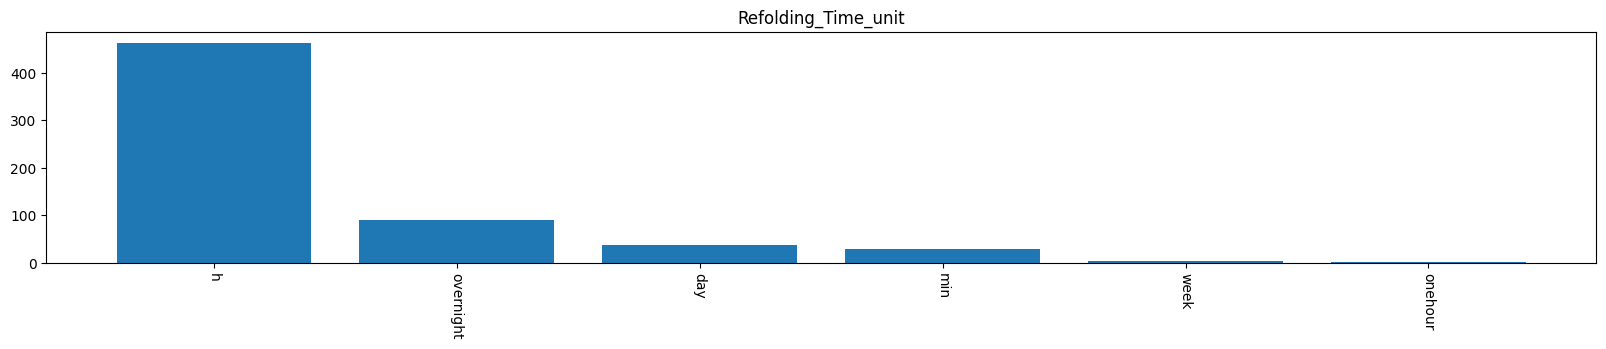

In [64]:
make_bar_plot("Refolding_Time_unit")

(array([543.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  1. ,  99.9, 198.8, 297.7, 396.6, 495.5, 594.4, 693.3, 792.2,
        891.1, 990. ]),
 <BarContainer object of 10 artists>)

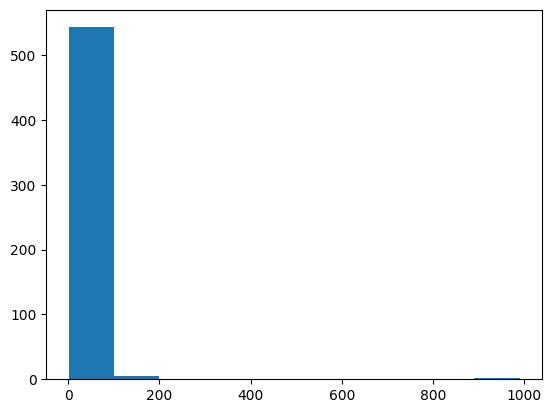

In [65]:
plt.hist(REFOLDdb_df["refolding_time_max"].values)

(array([543.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  1. ,  99.9, 198.8, 297.7, 396.6, 495.5, 594.4, 693.3, 792.2,
        891.1, 990. ]),
 <BarContainer object of 10 artists>)

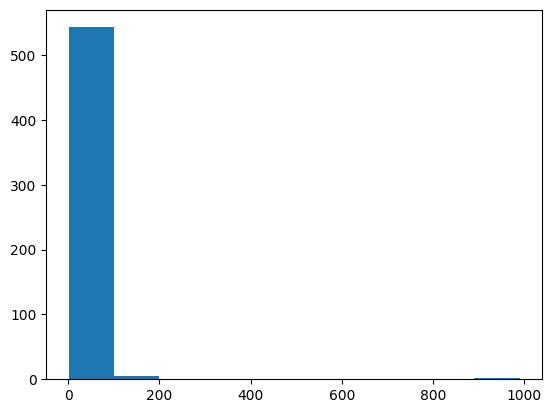

In [66]:
plt.hist(REFOLDdb_df["refolding_time_min"].values)

# Refolding Yield

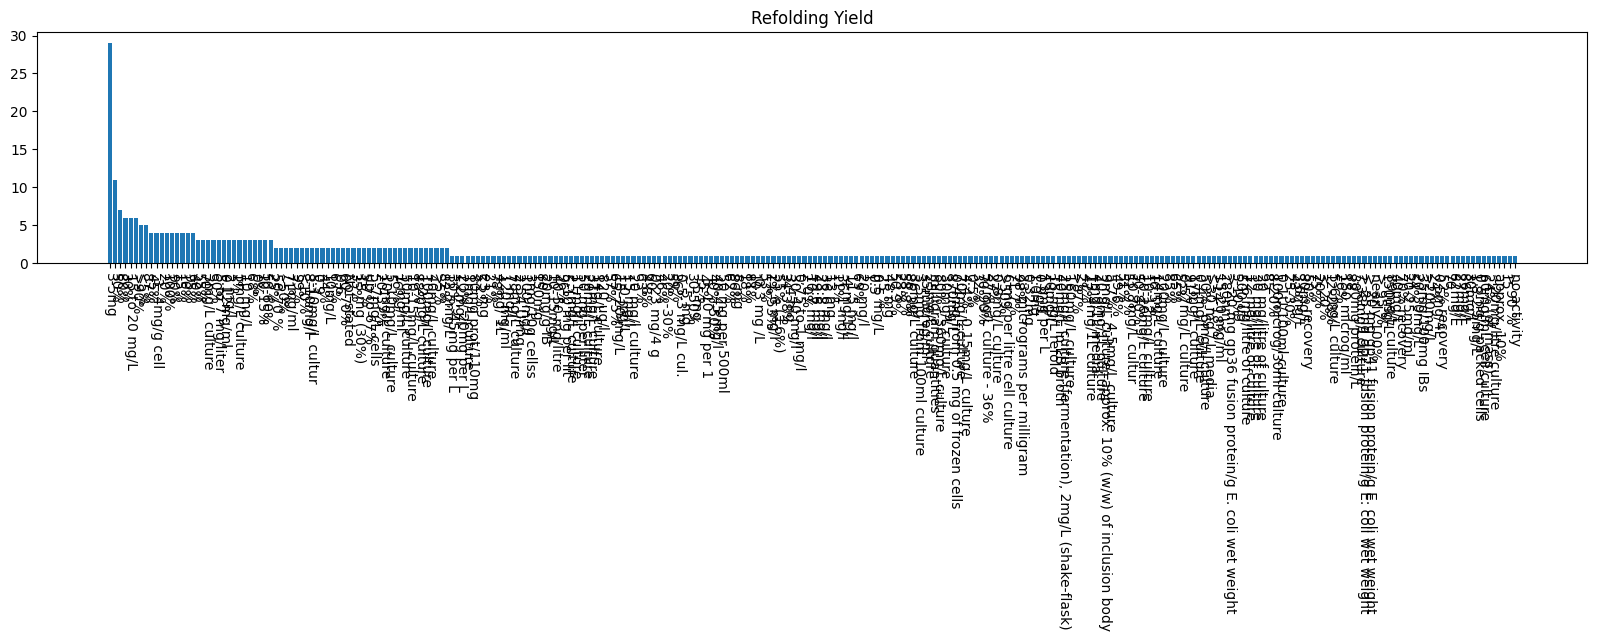

In [67]:
make_bar_plot("Refolding Yield")

In [68]:
def extract_refolding_yield(target_value):
    extracted_value_list = re.findall("\d+(?:\.\d+)?", target_value)
    if type(extracted_value_list) == list and len(extracted_value_list) == 2:
        max_refolding_yield_value , min_refolding_yield_value = extracted_value_list[1], extracted_value_list[0]
    elif len(extracted_value_list) == 1:
        max_refolding_yield_value , min_refolding_yield_value = extracted_value_list[0], extracted_value_list[0]
    else:
        max_refolding_yield_value , min_refolding_yield_value = np.nan, np.nan
        
    return max_refolding_yield_value, min_refolding_yield_value

In [69]:
max_refolding_yield_value_list = []
min_refolding_yield_value_list = []
for _ in REFOLDdb_df.loc[:, "Refolding Yield"].values:
    if type(_) == str:
        max_refolding_yield_value , min_refolding_yield_value = extract_refolding_yield(_)
        max_refolding_yield_value_list.append(float(max_refolding_yield_value))
        min_refolding_yield_value_list.append(float(min_refolding_yield_value))
    else:
        max_refolding_yield_value_list.append(_)
        min_refolding_yield_value_list.append(_)

In [70]:
REFOLDdb_df.loc[:, "refolding_yield_max"] = max_refolding_yield_value_list
REFOLDdb_df.loc[:, "refolding_yield_min"] = min_refolding_yield_value_list

In [71]:
def extract_refolding_yield_unit(target_value):
    target_value = target_value.replace("&#", "")
    target_value = target_value.replace(";", "")
    target_value = target_value.replace(" ", "")
    target_value = target_value.replace(".", "")
    target_value = target_value.replace("-", "")
    unit_list = re.findall("\D+", target_value)
    target_unit = "_".join(unit_list)
    
    unit_convert_dict = {'mgfrom_mlculture': 'mgfrom_mlculture',
                         "%": "%",
                         "mg/_Lculture": "mg/l",
                         "mg/_Lmedia": "mg/l",
                         "mg/Lcultureapprox_%(w/w)ofinclusionbody": '9mg/L culture; approx. 10% (w/w) of inclusion body',
                         "%_mg/Lculture": "%_mg/Lculture",
                         "mg/Lcultur": "mg/l",
                         "mg/Lculture": "mg/l",
                         ">_mg/Lmedia": "mg/l",
                         'mg/Lculture(fermentation),_mg/L(shakeflask)': '25mg/L culture (fermentation), 2mg/L (shake-flask)',
                         "milligramquantities": np.nan,
                         "mg/L": "mg/l",
                         "mgfrom_mgoffrozencells": '0.4mg from 0.5 mg of frozen cells',
                         "mg/Lculture_%": '37mg/L culture - 36%',
                         "<_%": "%",
                         ">_%": "%",
                         "mgperlitrecellculture": '6 mg per litre cell culture',
                         "microgramspermilligram": '23 micrograms per milligram',
                         "mg": "mg",
                         "Notstated": np.nan,
                         "g/L": "g/l",
                         "mgperL": "mg/l",
                         "mg/Lrefold": "mg/l",
                         "mg/LinLBbroth": "mg/l",
                         "mg/ml": "g/l",
                         "nearly_%": "%",
                         "%recovery": "%",
                         "mg/_mgIBs": '35mg/100mg IBs',
                         ">_mg/L": "mg/l",
                         "mg/_L": '0.5mg/4L',
                         "": "%",
                         "mg/gpackedcells": '0.5mg/g packed cells',
                         "mg/mLcellculture": "mg/ml", 
                         "%(ofmass)": "%",
                         "~_mg/litreculture": "mg",
                         "approx_%": "%",
                         "~_%": "%",
                         ">_mggp_fusionprotein/gEcoliwetweight": '> 20 mg gp41 fusion protein/g E. coli wet weight',
                         "ug": "ug",
                         "mg/litreofculture": "mg/l",
                         "mg/Lcells": "mg/l",
                         "microg/_mlculture": "mg/ml",
                         "U/_mlculture": '0.1U/100ml culture',
                         "microg/ml": "mg/ml",
                         "mgprotein/L": "mg/l",
                         "upto_%": "%",
                         "nm": "nm",
                         "mg/_gcellss": '3mg/10g cellss',
                         "mg/l": "mg/l",
                         "mg/gIB": "mg/g",
                         "%,_mgperL": '20%, 20mg per L',
                         "mg/gcell": "mg/g",
                         "g/Lculture": "mg/ml",
                         "mgperlit": "mg/l",
                         "mg/litre": "mg/l",
                         "mg(_%)": '15 mg (30%)',
                         "U/mg": "mg/g",
                         "mgprot/_mg": '80mg prot/110mg',
                         "mgperliter": "mg/l", 
                         "%(±_%)": '55% (±6%)',
                         "to_mg/l": '0.75 to 1 mg/l',
                         ",_%": '2,0%',
                         "ug/l": "ug/l",
                         "%_%": "%",
                         "to_mg/L": 'mg/l',
                         "to_mg/liter": "mg/l",
                         "–_mg/L": "mg/l",
                         "mg/lculture": "mg/l",
                         "mg/_g": "mg/g",
                         "mg/Lcul": "mg/l",
                         "~_mg": "mg",
                         "–_mgper": ' 5–10 mg per 1',
                         "mgper_ml": '50 mg per 500ml',
                         "noactivity": np.nan
                        }
    
    if target_unit in unit_convert_dict.keys():
        target_unit = unit_convert_dict[target_unit]
    else:
        print(target_unit)
        raise ValueError()
        
    return target_unit

In [72]:
refolding_yield_unit_list = []
for _ in REFOLDdb_df.loc[:, "Refolding Yield"].values:
    if type(_) == str:
        refolding_yield_unit = extract_refolding_yield_unit(_)
        refolding_yield_unit_list.append(refolding_yield_unit)
    else:
        refolding_yield_unit_list.append(_)

collections.Counter(refolding_yield_unit_list)

Counter({nan: 738,
         'mgfrom_mlculture': 1,
         '%': 212,
         'mg/l': 117,
         '9mg/L culture; approx. 10% (w/w) of inclusion body': 1,
         '%_mg/Lculture': 4,
         '25mg/L culture (fermentation), 2mg/L (shake-flask)': 1,
         '0.4mg from 0.5 mg of frozen cells': 1,
         '37mg/L culture - 36%': 1,
         '6 mg per litre cell culture': 1,
         '23 micrograms per milligram': 1,
         'mg': 40,
         'g/l': 11,
         '35mg/100mg IBs': 1,
         '0.5mg/4L': 3,
         '0.5mg/g packed cells': 1,
         'mg/ml': 5,
         '> 20 mg gp41 fusion protein/g E. coli wet weight': 3,
         'ug': 1,
         '0.1U/100ml culture': 1,
         'nm': 1,
         '3mg/10g cellss': 1,
         'mg/g': 7,
         '20%, 20mg per L': 2,
         '15 mg (30%)': 2,
         '80mg prot/110mg': 1,
         '55% (±6%)': 1,
         '0.75 to 1 mg/l': 1,
         '2,0%': 1,
         'ug/l': 1,
         ' 5–10 mg per 1': 1,
         '50 mg per 500ml': 

In [73]:
REFOLDdb_df.loc[:, "refolding_yield_unit"] = refolding_yield_unit_list

In [74]:
for key, value in REFOLDdb_df["refolding_yield_unit"].value_counts().items():
    print(key)

%
mg/l
mg
g/l
mg/g
mg/ml
%_mg/Lculture
> 20 mg gp41 fusion protein/g E. coli wet weight
0.5mg/4L
20%, 20mg per L
15 mg (30%)
80mg prot/110mg
nm
55% (±6%)
0.75 to 1 mg/l
2,0%
ug/l
 5–10 mg per 1
3mg/10g cellss
mgfrom_mlculture
0.1U/100ml culture
ug
0.5mg/g packed cells
35mg/100mg IBs
23 micrograms per milligram
6 mg per litre cell culture
37mg/L culture - 36%
0.4mg from 0.5 mg of frozen cells
25mg/L culture (fermentation), 2mg/L (shake-flask)
9mg/L culture; approx. 10% (w/w) of inclusion body
50 mg per 500ml


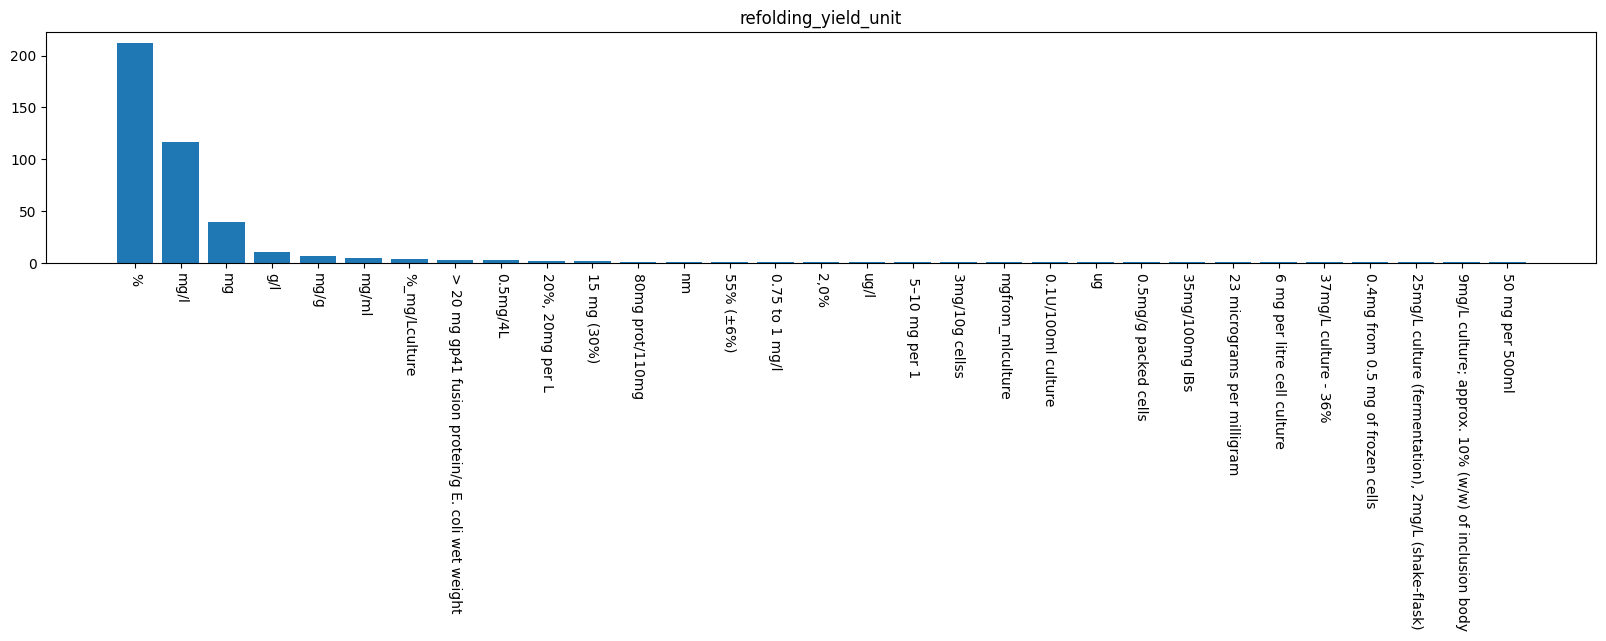

In [75]:
make_bar_plot("refolding_yield_unit")

(array([122.,  53.,  42.,  21.,  23.,  39.,  17.,  11.,  19.,  19.,  28.,
         15.,   1.,   1.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0. ,   8.7,  17.4,  26.1,  34.8,  43.5,  52.2,  60.9,  69.6,
         78.3,  87. ,  95.7, 104.4, 113.1, 121.8, 130.5, 139.2, 147.9,
        156.6, 165.3, 174. , 182.7, 191.4, 200.1, 208.8, 217.5, 226.2,
        234.9, 243.6, 252.3, 261. , 269.7, 278.4, 287.1, 295.8, 304.5,
        313.2, 321.9, 330.6, 339.3

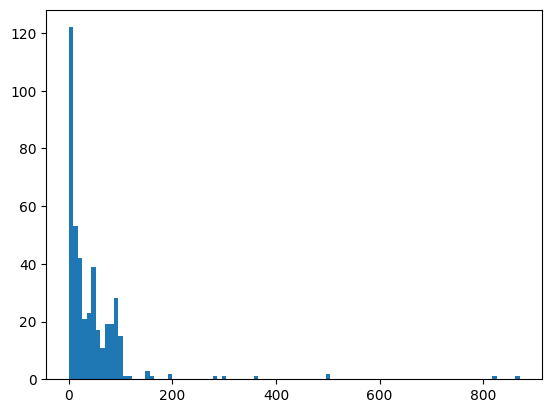

In [76]:
plt.hist(REFOLDdb_df["refolding_yield_max"], bins=100)

(array([130.,  58.,  40.,  18.,  21.,  42.,  16.,  12.,  15.,  20.,  27.,
         13.,   0.,   1.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0. ,   8.7,  17.4,  26.1,  34.8,  43.5,  52.2,  60.9,  69.6,
         78.3,  87. ,  95.7, 104.4, 113.1, 121.8, 130.5, 139.2, 147.9,
        156.6, 165.3, 174. , 182.7, 191.4, 200.1, 208.8, 217.5, 226.2,
        234.9, 243.6, 252.3, 261. , 269.7, 278.4, 287.1, 295.8, 304.5,
        313.2, 321.9, 330.6, 339.3

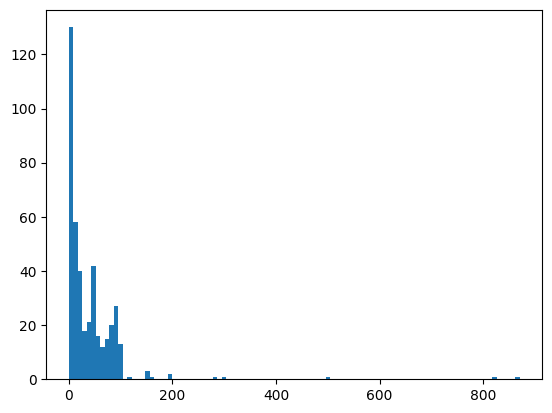

In [77]:
plt.hist(REFOLDdb_df["refolding_yield_min"], bins=100)

# Purity

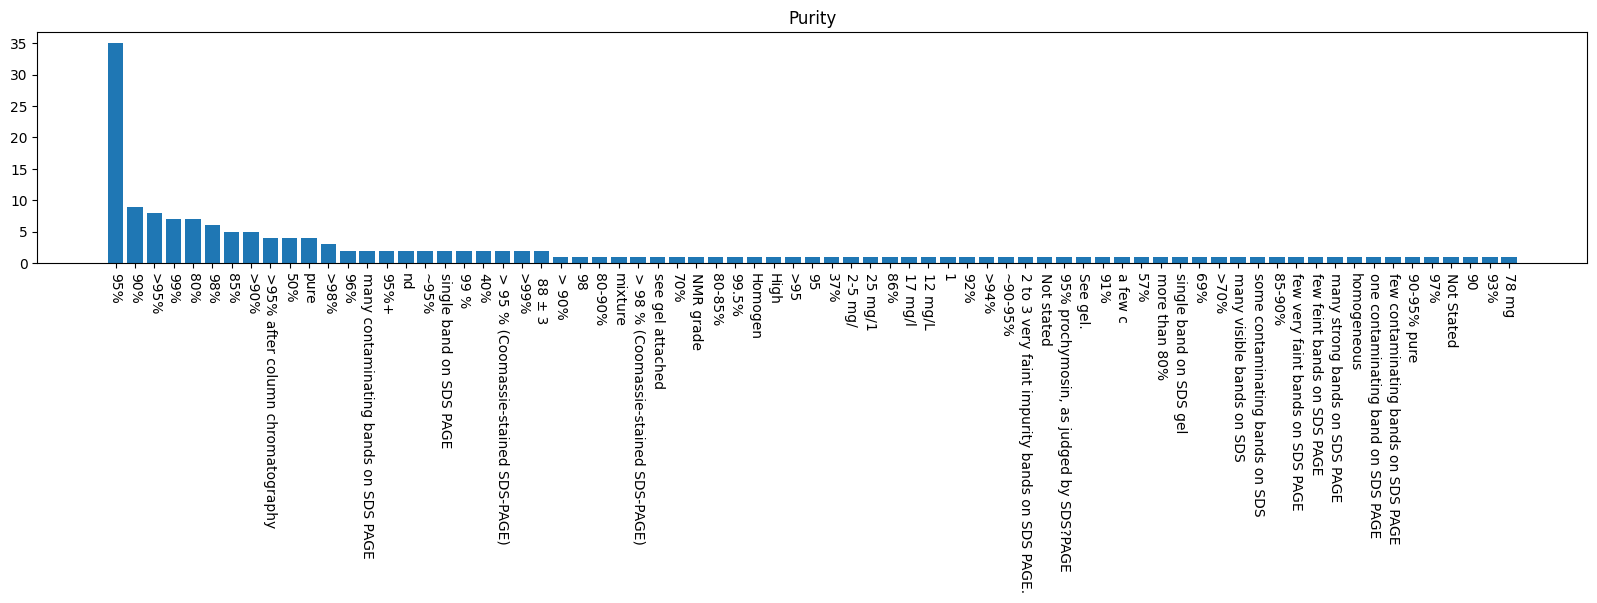

In [78]:
make_bar_plot("Purity")

In [79]:
def extract_purity(target_value):
    extracted_value_list = re.findall("\d+(?:\.\d+)?", target_value)
    if type(extracted_value_list) == list and len(extracted_value_list) == 2:
        max_purity_value , min_purity_value = extracted_value_list[1], extracted_value_list[0]
    elif len(extracted_value_list) == 1:
        max_purity_value , min_purity_value = extracted_value_list[0], extracted_value_list[0]
    else:
        max_purity_value , min_purity_value = np.nan, np.nan
        
    return max_purity_value , min_purity_value

In [80]:
max_purity_value_list = []
min_purity_value_list = []
for _ in REFOLDdb_df.loc[:, "Purity"].values:
    if type(_) == str:
        max_purity_value , min_purity_value = extract_purity(_)
        max_purity_value_list.append(float(max_purity_value))
        min_purity_value_list.append(float(min_purity_value))
    else:
        max_purity_value_list.append(_)
        min_purity_value_list.append(_)
        
REFOLDdb_df.loc[:, "purity_max"] = max_purity_value_list
REFOLDdb_df.loc[:, "purity_min"] = min_purity_value_list

In [81]:
def extract_purity_unit(target_value):
    target_value = target_value.replace("&#", "")
    target_value = target_value.replace(";", "")
    target_value = target_value.replace(" ", "")
    target_value = target_value.replace(".", "")
    target_value = target_value.replace("-", "")
    unit_list = re.findall("\D+", target_value)
    target_unit = "_".join(unit_list)
    
    unit_convert_dict = {"seegelattached": np.nan,
                         ">_%": "%",
                         "Notstated": np.nan,
                         "%prochymosin,asjudgedbySDS?PAGE": "%",
                         "Seegel": np.nan,
                         "pure": "pure",
                         "%": "%",
                         'afewc': np.nan,
                         "morethan_%": "%",
                         "singlebandonSDSgel": 'single band on SDS gel',
                         "manyvisiblebandsonSDS": np.nan,
                         "to_veryfaintimpuritybandsonSDSPAGE": np.nan,
                         "singlebandonSDSPAGE": 'single band on SDS PAGE',
                         "somecontaminatingbandsonSDS": np.nan,
                         "fewveryfaintbandsonSDSPAGE": np.nan,
                         "fewfeintbandsonSDSPAGE": np.nan,
                         "manystrongbandsonSDSPAGE": np.nan,
                         "manycontaminatingbandsonSDSPAGE": np.nan,
                         "homogeneous": np.nan,
                         "onecontaminatingbandonSDSPAGE": np.nan,
                         "fewcontaminatingbandsonSDSPAGE": np.nan,
                         "%pure": "%",
                         "nd": np.nan,
                         "NotStated": np.nan,
                         "": "%",
                         "~_%": "%",
                         ">_%(CoomassiestainedSDSPAGE)": "%",
                         ">_%aftercolumnchromatography": "%",
                         "%+": "%",
                         "mixture": np.nan,
                         "NMRgrade": np.nan,
                         "Homogen": np.nan,
                         "High": np.nan,
                         ">": "%",
                         "±": ' 88 ± 3',
                         "mg/": "mg/",
                         "mg/l": "mg/l",
                         "mg/L": "mg/L",
                         "mg": "mg"
                        }
    
    if target_unit in unit_convert_dict.keys():
        target_unit = unit_convert_dict[target_unit]
    else:
        print(target_unit)
        raise ValueError()
        
    return target_unit

In [82]:
purity_unit_list = []
for _ in REFOLDdb_df.loc[:, "Purity"].values:
    if type(_) == str:
        purity_unit = extract_purity_unit(_)
        purity_unit_list.append(purity_unit)
    else:
        purity_unit_list.append(_)

collections.Counter(purity_unit_list)

Counter({nan: 1017,
         '%': 133,
         'pure': 4,
         'single band on SDS gel': 1,
         'single band on SDS PAGE': 2,
         ' 88 ± 3': 2,
         'mg/': 2,
         'mg/l': 1,
         'mg/L': 1,
         'mg': 1})

In [83]:
REFOLDdb_df.loc[:, "purity_unit"] = purity_unit_list

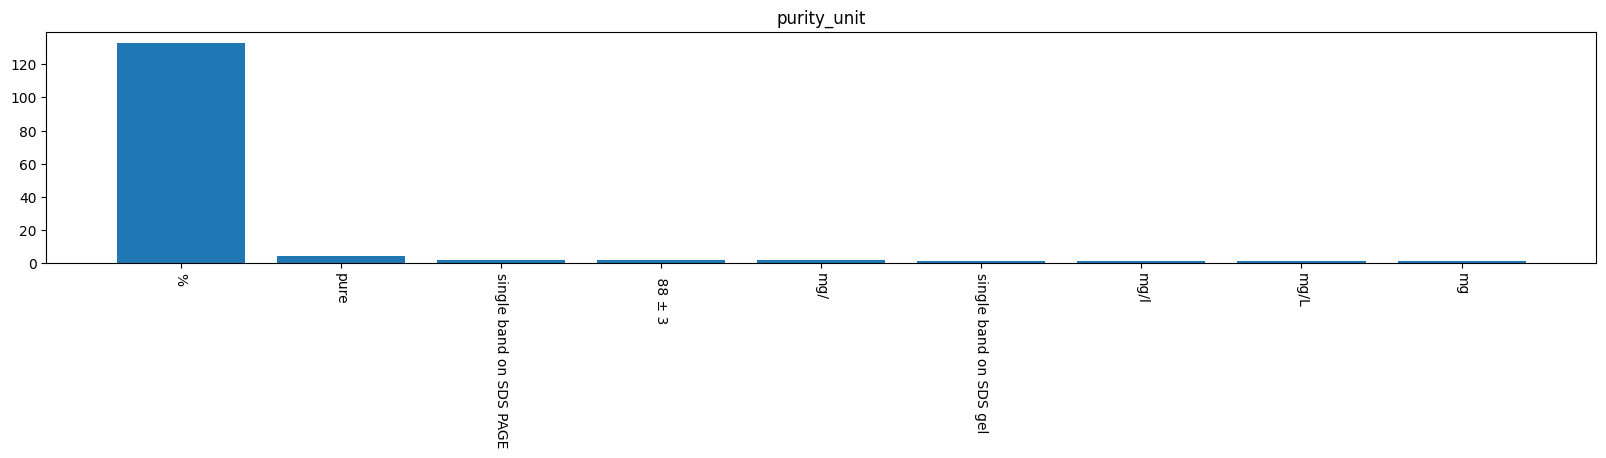

In [84]:
make_bar_plot("purity_unit")

(array([  6.,   2.,   0.,   3.,   4.,   1.,   1.,   3.,  15., 106.]),
 array([ 1.  , 10.85, 20.7 , 30.55, 40.4 , 50.25, 60.1 , 69.95, 79.8 ,
        89.65, 99.5 ]),
 <BarContainer object of 10 artists>)

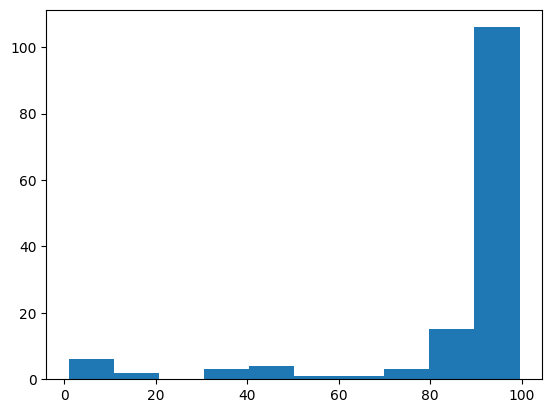

In [85]:
plt.hist(REFOLDdb_df["purity_max"].values)

(array([  3.,   2.,   1.,   3.,   4.,   1.,   1.,   3.,  19., 104.]),
 array([ 1.  , 10.85, 20.7 , 30.55, 40.4 , 50.25, 60.1 , 69.95, 79.8 ,
        89.65, 99.5 ]),
 <BarContainer object of 10 artists>)

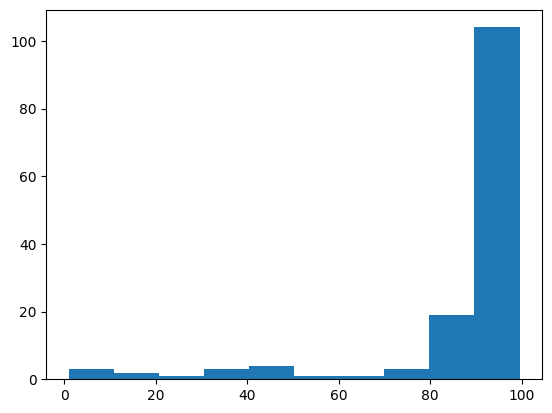

In [86]:
plt.hist(REFOLDdb_df["purity_min"].values)

In [87]:
REFOLDdb_df["Refolding Protocol length"] = [len(refolding_protocol) if type(refolding_protocol) == str else 0 for refolding_protocol in REFOLDdb_df.loc[:, "Refolding Protocol"].values]

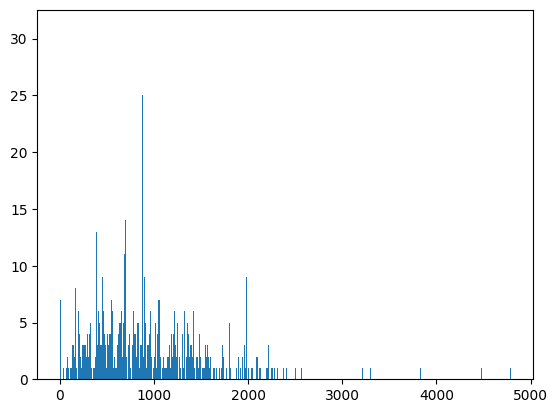

In [88]:
plt.hist(REFOLDdb_df["Refolding Protocol length"], bins=1000);

In [89]:
REFOLDdb_df[REFOLDdb_df["Refolding Protocol length"] < 100].loc[:, "Refolding Protocol"]

36      Refolding was performed under aeration, with s...
40      Refolding was initiated by a 20-fold dilution ...
47      Protein folds and remains soluble, however it ...
51                                                unknown
81                                                unknown
128                               After growing at 37\r\n
138                                               unknown
139                                               unknown
202     The inclusion bodies were solubilized in 4M Gd...
246                         FoldIt Screen kit instruction
271                                               Unknown
273                                               Unknown
274               see JBC 271:21853 for detailed protocol
275                                                   NaN
276                                                   NaN
351     For refolding, the protein was dialysed agains...
357          see:  Protein Expr Purif. 1995 Feb;6(1):1-9.
452     Refold

In [90]:
REFOLDdb_df.loc[36, "Refolding Protocol"]

'Refolding was performed under aeration, with shaking at 150rpm at 26C for 16-20h.'

In [91]:
numeric_cols_list = ["Chain Length", "Molecular Weight", "Pi", "Expression Temp", "Refolding pH", "Refolding Temperature"]

In [92]:
REFOLDdb_df.loc[:, numeric_cols_list].describe()

,Chain Length,Molecular Weight,Pi,Expression Temp,Refolding pH,Refolding Temperature
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,290.884880,32280.120876,6.841150,32.006873,7.703436,12.701890
std,221.106851,24381.728240,1.749339,11.987380,1.793009,10.804507
min,0.000000,203.200000,0.000000,0.000000,0.000000,0.000000
25%,147.000000,16283.575000,5.419062,37.000000,7.500000,4.000000
50%,233.000000,25867.250000,6.300000,37.000000,8.000000,4.000000
75%,371.250000,41564.600000,8.621912,37.000000,8.200000,25.000000
max,2334.000000,264726.000000,12.100000,42.000000,25.000000,65.000000
